### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Importing Dataset

In [4]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [4]:
data_true.shape

(21417, 4)

In [6]:
data_fake.shape

(23481, 4)

### Inserting new label column

In [5]:
data_true['label'] = 1
data_fake['label'] = 0

In [8]:
data_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
data_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

### Removing last 10 rows for manual testing

In [6]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
  data_fake.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
  data_true.drop([i], axis = 0, inplace = True)

In [10]:
data_fake_manual_testing.shape, data_true_manual_testing.shape

((10, 5), (10, 5))

### Merging True and Fake dataframes


In [7]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.tail()

,title,text,subject,date,label
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [11]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

### Removing columns which are not required



In [8]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

### Random shuffling

In [9]:
data = data.sample(frac = 1)


In [14]:
data.head()

,text,label
19078,TOKYO (Reuters) - Tokyo Governor Yuriko Koike ...,1
5404,WASHINGTON (Reuters) - President Donald Trump ...,1
20710,"Father Robert A. Sirico, President and Co-Foun...",0
7967,(Reuters) - The Kansas Secretary of State and ...,1
13877,TOKYO (Reuters) - Japan s Coast Guard found th...,1


In [10]:
data.reset_index(inplace = True)

In [16]:
data.head()

,index,text,label
0,19078,TOKYO (Reuters) - Tokyo Governor Yuriko Koike ...,1
1,5404,WASHINGTON (Reuters) - President Donald Trump ...,1
2,20710,"Father Robert A. Sirico, President and Co-Foun...",0
3,7967,(Reuters) - The Kansas Secretary of State and ...,1
4,13877,TOKYO (Reuters) - Japan s Coast Guard found th...,1


### Removing Index column


In [11]:
data.drop(['index'], axis = 1, inplace = True)

In [20]:
data.head()

,text,label
0,WASHINGTON (Reuters) - The U.S. Department of ...,1
1,Saturday Night Live s cold open last night was...,0
2,Newt Gingrich was promoting his new book Unde...,0
3,WASHINGTON (Reuters) - Republican leaders in t...,1
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [21]:
data.columns

Index(['text', 'label'], dtype='object')

In [12]:
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

C:\Users\Aditya28\AppData\Local\Temp\ipykernel_7352\4042680642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = 0
C:\Users\Aditya28\AppData\Local\Temp\ipykernel_7352\4042680642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = 1


### Function to clean and normalizes input text

In [13]:
def wordopt(text):
    text = text.lower()  # Convert text to lowercase for uniformity
    text = re.sub(r'\[.*?\]', '', text)  # Remove content inside square brackets
    text = re.sub(r"\\W", " ", text)  # Replace non-word characters with space
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers

    return text

In [13]:
data['text'] = data['text'].apply(wordopt)

### Defining dependent and independent variable

In [14]:
x = data['text']
y = data['label']

### Split data into 75% training and 25% testing sets


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(
    stop_words='english',    # remove English stopwords
    max_features=5000,       # also limit features for memory efficiency
    ngram_range=(1,2)        # optionally include bigrams for context
)

xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

joblib.dump(vectorization, "vectorizer.joblib")

['vectorizer.joblib']

## Custom Logistic Regression (From Scratch)

In [ ]:
# Import our optimized custom logistic regression implementation
from models.optimized_custom_logistic_regression import OptimizedCustomLogisticRegression

# Initialize and train optimized custom logistic regression
optimized_custom_LR = OptimizedCustomLogisticRegression(
    learning_rate=0.01,
    max_iterations=500,
    regularization='l2',
    lambda_reg=0.01,
    batch_size=2000,  # Larger batch size for efficiency
    early_stopping=True,
    random_state=42,
    verbose=True
)

print("Training Optimized Custom Logistic Regression...")
optimized_custom_LR.fit(xv_train, y_train)

# Save the optimized custom model
optimized_custom_LR.save_model("optimized_custom_logistic_regression_model.joblib")

Training Optimized Custom Logistic Regression...
Iteration 0: Cost = 0.693009, Accuracy = 0.5248
Iteration 50: Cost = 0.682022, Accuracy = 0.5226
Iteration 100: Cost = 0.672238, Accuracy = 0.5492
Iteration 150: Cost = 0.662753, Accuracy = 0.6486
Iteration 200: Cost = 0.653549, Accuracy = 0.7448
Iteration 250: Cost = 0.644617, Accuracy = 0.8079
Iteration 300: Cost = 0.635947, Accuracy = 0.8470
Iteration 350: Cost = 0.627530, Accuracy = 0.8725
Iteration 400: Cost = 0.619359, Accuracy = 0.8901
Iteration 450: Cost = 0.611422, Accuracy = 0.9011


Accuracy: 0.9885026737967915

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



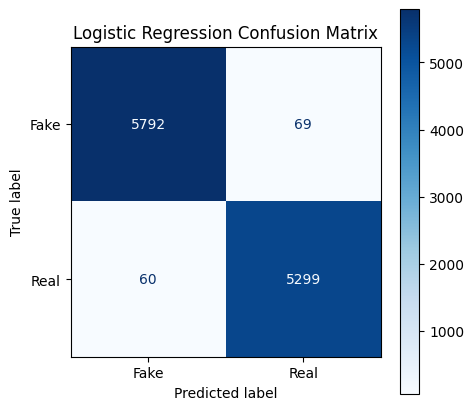

In [ ]:
# Make predictions with optimized custom logistic regression
pred_optimized_custom_lr = optimized_custom_LR.predict(xv_test)

# Calculate accuracy
acc_optimized_custom = optimized_custom_LR.score(xv_test, y_test)
print("Optimized Custom Logistic Regression Accuracy:", acc_optimized_custom)
print()

# Classification report
print("Optimized Custom Logistic Regression Classification Report:\n", classification_report(y_test, pred_optimized_custom_lr))

# Confusion matrix
cm_optimized_custom = confusion_matrix(y_test, pred_optimized_custom_lr)
disp_optimized_custom = ConfusionMatrixDisplay(cm_optimized_custom, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp_optimized_custom.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Optimized Custom Logistic Regression Confusion Matrix")
plt.show()

# Plot training history
optimized_custom_LR.plot_training_history()

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

joblib.dump(LR, "logistic_regression_model.joblib")

['logistic_regression_model.joblib']

Accuracy: 0.985204991087344

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5880
           1       0.98      0.99      0.98      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



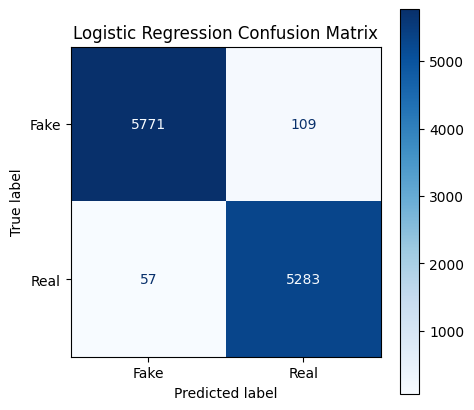

In [36]:
pred_lr = LR.predict(xv_test)

acc = accuracy_score(y_test, pred_lr)
print("Accuracy:", acc)
print()

print("Classification Report:\n", classification_report(y_test, pred_lr))

cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()

## Decision Tree Classification


In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

joblib.dump(DT, "decision_tree_model.joblib")

['decision_tree_model.joblib']

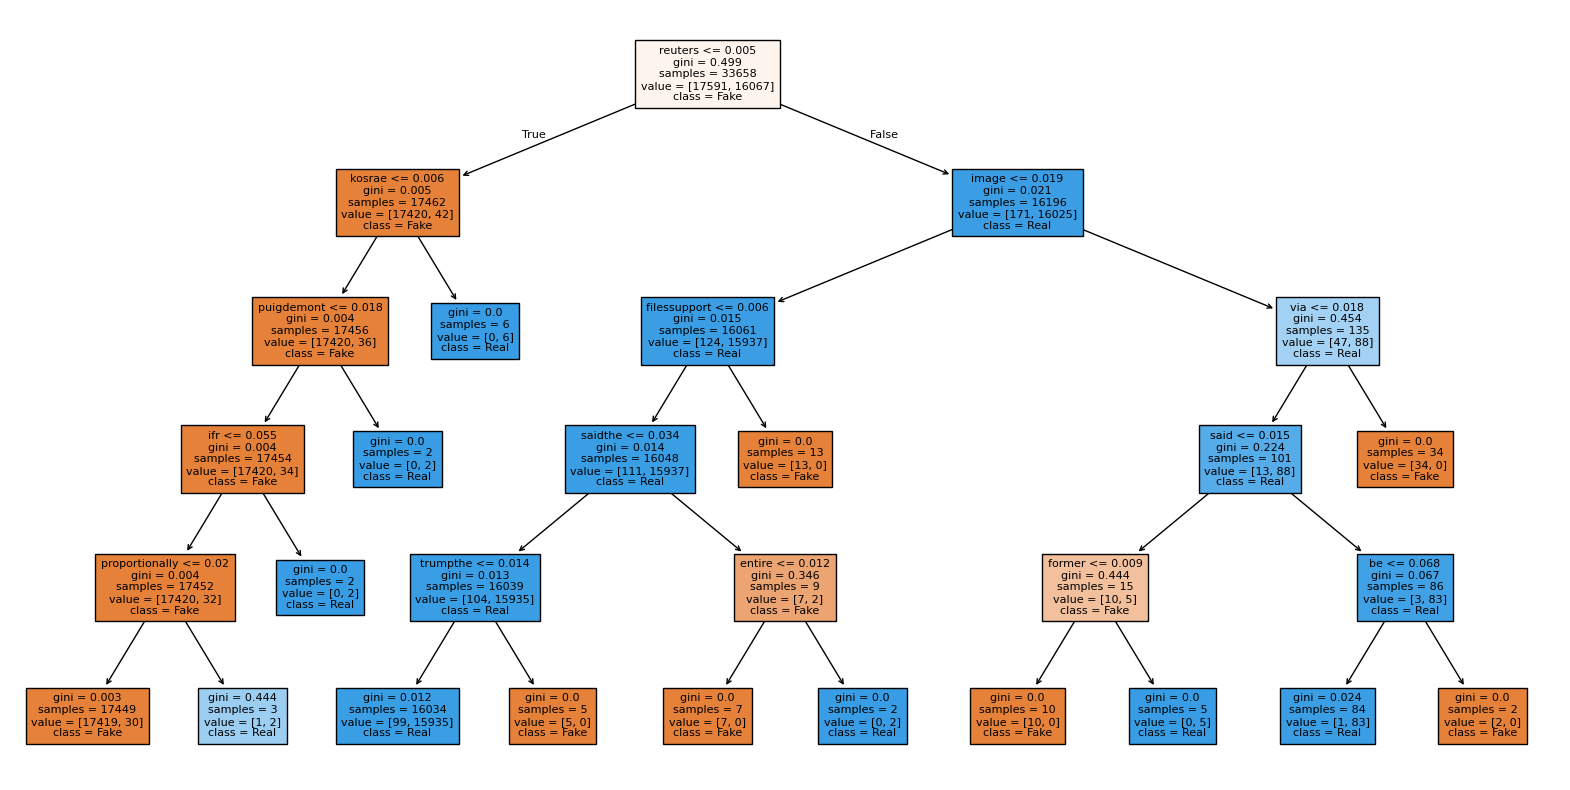

In [38]:
from sklearn.tree import plot_tree

# Limit depth to make tree readable
DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(xv_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(DT, feature_names=vectorization.get_feature_names_out(), class_names=["Fake", "Real"], filled=True, fontsize=8)
plt.show()


Accuracy: 0.9944741532976827

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5880
           1       0.99      1.00      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



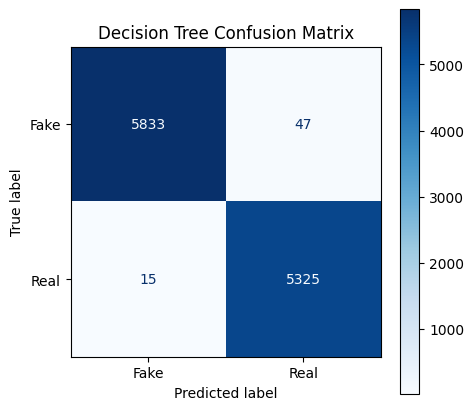

In [39]:
pred_dt = DT.predict(xv_test)

acc = accuracy_score(y_test, pred_dt)
print("Accuracy:", acc)
print()

print("Classification Report:\n", classification_report(y_test, pred_dt))

cm = confusion_matrix(y_test, pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Decision Tree Confusion Matrix")
plt.show()


In [ ]:
from models.custom_decision_tree import DecisionTree

xv_train_small = xv_train[:1000].toarray()        # 2D
y_train_small = np.array(y_train[:1000]).reshape(-1, 1)  # 2D column

DT_custom = DecisionTree(max_depth=8, min_samples=5)
DT_custom.fit(xv_train_small, y_train_small)

joblib.dump(DT_custom, "custom_decision_tree_model.joblib")


## Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

joblib.dump(GBC, "gradient_boosting_model.joblib")

['gradient_boosting_model.joblib']

Accuracy: 0.9947415329768271

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5861
           1       0.99      1.00      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



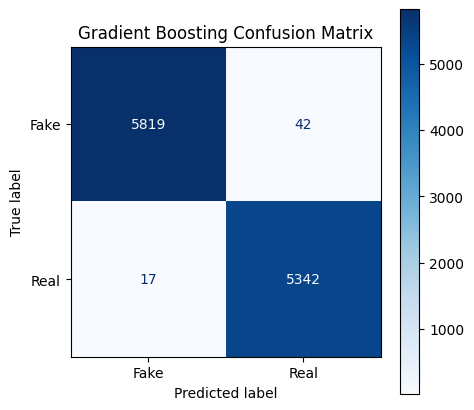

In [ ]:
pred_gbc = GBC.predict(xv_test)

print("Accuracy:", accuracy_score(y_test, pred_gbc))
print()

print("Classification Report:\n", classification_report(y_test, pred_gbc))

cm = confusion_matrix(y_test, pred_gbc)
disp = ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Gradient Boosting Confusion Matrix")
plt.show()


In [ ]:
from models.custom_gradient_boosting import GradientBoostingStumpClassifier

GBC = GradientBoostingStumpClassifier(
    n_estimators=200,
    learning_rate=0.1,
    row_subsample=0.8,
    feature_subsample=0.2,
    random_state=0,
    verbose=True
)

# Fit on your existing training data
GBC.fit(xv_train, y_train)

# Save model
joblib.dump(GBC, "gradient_boosting_model.joblib")

## Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

joblib.dump(RFC, "random_forest_model.joblib")

['random_forest_model.joblib']

Accuracy: 0.9901960784313726

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



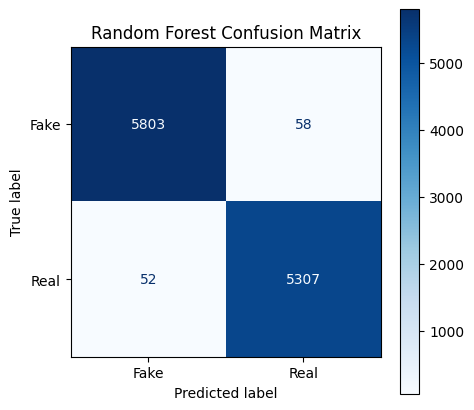

In [ ]:
pred_rfc = RFC.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, pred_rfc))
print()

print("Classification Report:\n", classification_report(y_test, pred_rfc))

cm = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(cm, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Random Forest Confusion Matrix")
plt.show()


In [ ]:
from models.custom_random_forest import CustomRandomForest

RFC = CustomRandomForest(
    n_estimators=200,
    max_depth=5,
    min_samples=2,
    bootstrap=True,
    random_state=0
)

# Fit on your existing training data
RFC.fit(xv_train, y_train)

# Save model
joblib.dump(RFC, "random_forest_model.joblib")

# Model Testing

In [ ]:
def output_lable(n):
  if n == 0:
      return "Fake News"
  elif n == 1:
      return "Not A Fake News"

def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_GBC = GBC.predict(new_xv_test)
  pred_RFC = RFC.predict(new_xv_test)

  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
## Custom Gradient Boosting (From Scratch)
from models.custom_gradient_boosting import GradientBoostingStumpClassifier
import joblib

GBS = GradientBoostingStumpClassifier(
    n_estimators=200,
    learning_rate=0.1,
    row_subsample=0.8,
    feature_subsample=0.2,
    random_state=42,
    verbose=True,
)

print("Training Custom Gradient Boosting (stumps)...")
GBS.fit(xv_train, y_train)

# Save model
joblib.dump(GBS, "custom_gb_stumps_model.joblib")
print("Saved custom GB model -> custom_gb_stumps_model.joblib")


Training Custom Gradient Boosting (stumps)...


NameError: name 'xv_train' is not defined

In [ ]:
# Evaluate Custom Gradient Boosting
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

pred_gbs_custom = GBS.predict(xv_test)
acc_gbs_custom = accuracy_score(y_test, pred_gbs_custom)
print("Custom GB (stumps) Accuracy:", acc_gbs_custom)
print()
print("Classification Report:\n", classification_report(y_test, pred_gbs_custom))

cm_gbs_custom = confusion_matrix(y_test, pred_gbs_custom)
disp_gbs_custom = ConfusionMatrixDisplay(cm_gbs_custom, display_labels=["Fake", "Real"])
fig, ax = plt.subplots(figsize=(5,5))
disp_gbs_custom.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Custom GB (Stumps) Confusion Matrix")
plt.show()


### Input News to test

In [ ]:
input_news = input("Enter a news: ")
manual_testing(input_news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
